In [1]:
import sys
sys.path.insert(1, './lib')

import data

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:

datasets = [
  data.read('./data/graph-data-sld.csv'),
  data.read('./data/graph-data-fqdn.csv'),
]

In [3]:
for dataset in datasets:
  dataset['tracker'] = LabelEncoder().fit_transform(dataset['tracker'])

In [4]:
features = [col for col in list(datasets[0].columns) if col.lower() not in ['id', 'weight', 'tracker']]

if replace=False, N cannot be higher as 10000 or something
this indicates that there are many duplicates in the data sets
is skewed data a problem?

In [5]:
extension = []
for dataset in datasets:
  extension.append(data.sample_equal_distribution(dataset, 'tracker'))

datasets.extend(extension)

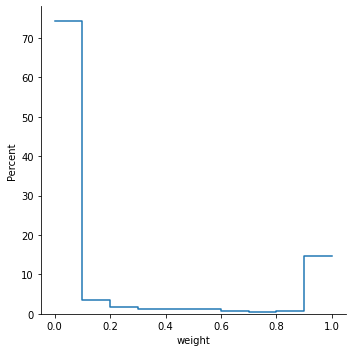

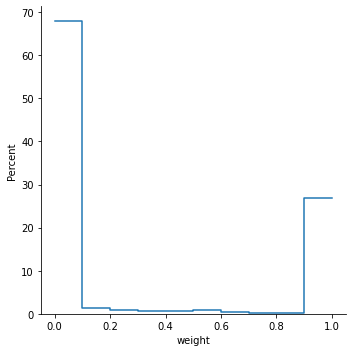

In [6]:
for dataset in datasets[:2]:
  sns.displot(
    dataset['weight'], 
    stat='percent', 
    bins=10, 
    element='step', 
    fill=False
  )

In [7]:
for dataset in datasets[:2]:
  sns.displot(
    data=dataset,
    x='pageranks',
    hue='tracker'
  )

KeyboardInterrupt: 

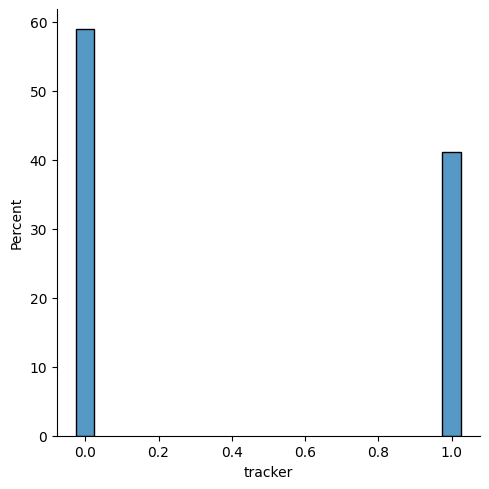

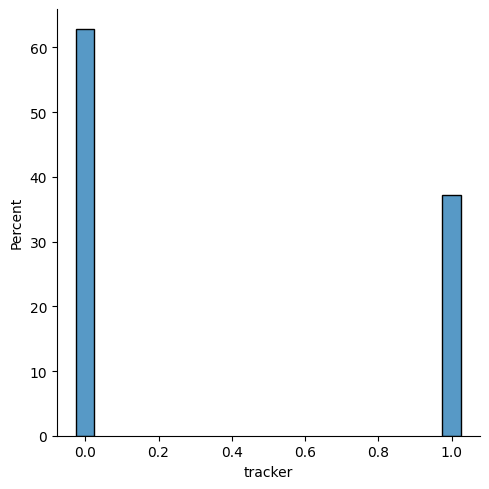

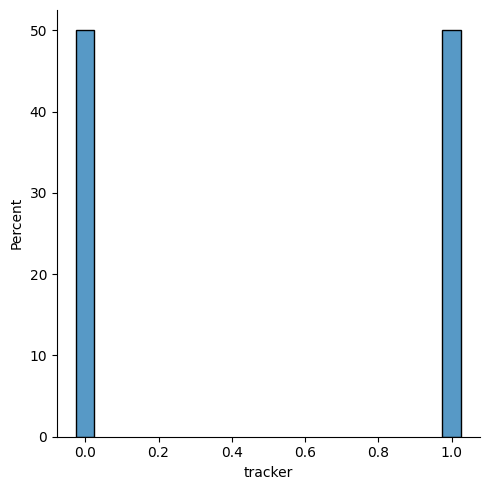

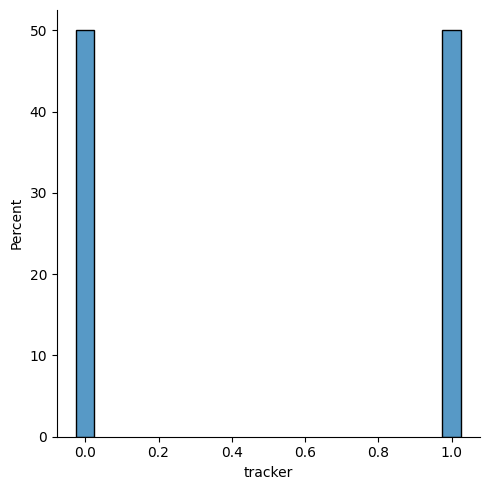

In [ ]:
for dataset in datasets:
  sns.displot(
    dataset['tracker'], 
    stat='percent', 
    discrete=True, 
    shrink=0.05
  )

/tmp/ipykernel_12419/2198921476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


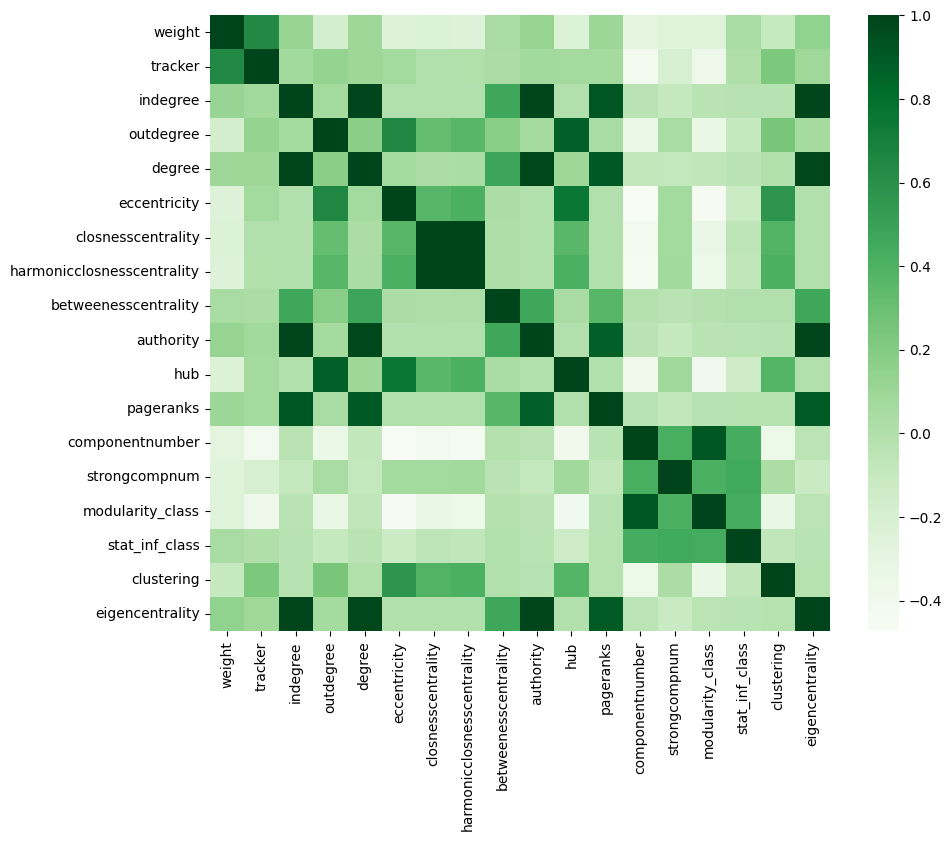

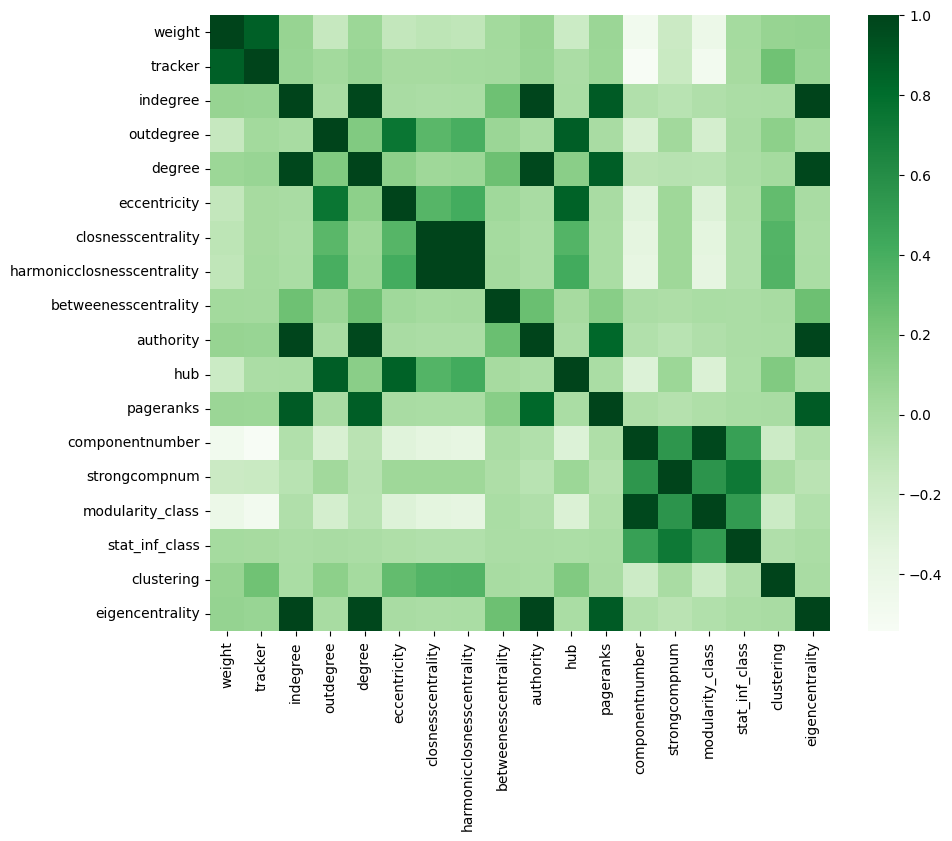

In [ ]:
for dataset in datasets[:2]:
  corr = dataset.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, cmap="Greens")

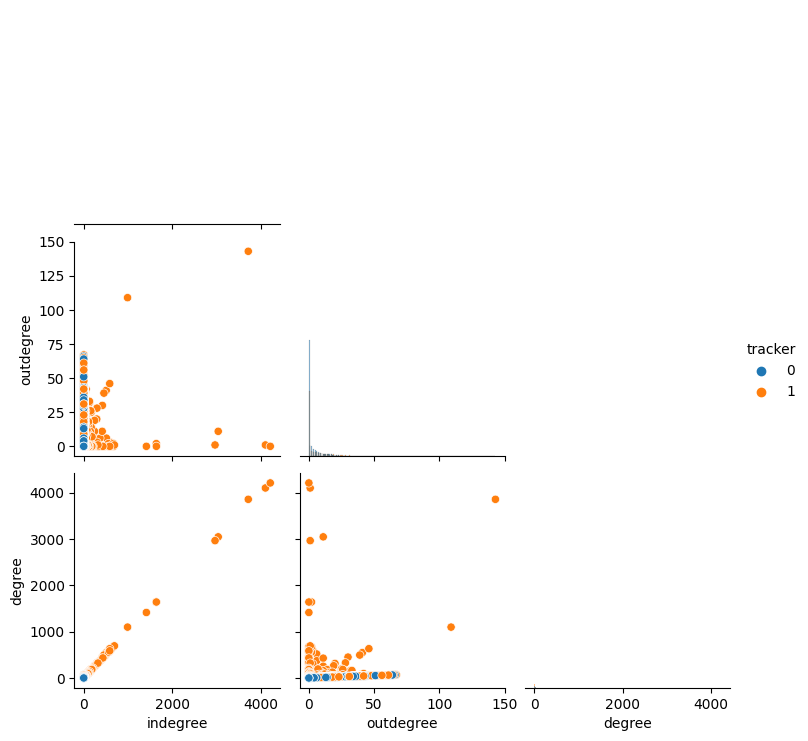

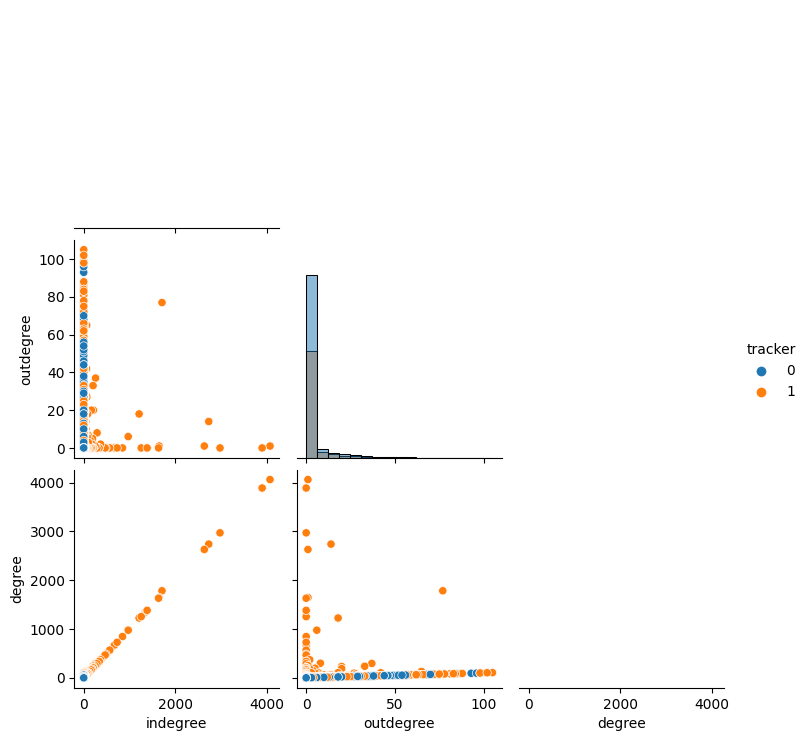

In [ ]:
for dataset in datasets[:2]:
  sns.pairplot(
    dataset, 
    hue='tracker', 
    vars=features[:3],
    diag_kind="hist",
    diag_kws=dict(
      color=".2", 
      hue=dataset['tracker']
    ),
    corner=True
  )
  plt.show()